# Python features worth knowing

In [1]:
!python --version

Python 3.12.9


In [2]:
import xarray as xr
import numpy as np

for pkg in [xr, np]:
    print(f"{pkg.__name__}: {pkg.__version__}")

xarray: 2025.7.1
numpy: 2.3.1


In [3]:
ds = xr.tutorial.open_dataset("air_temperature").compute()
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## ``match-case`` statement

In [4]:
def compute_average(data, avg_type):
    AVAILABLE_AVG_TYPES = [
        "zonal",
        "meridional",
        "spatial",
        "temporal",
        "spatio-temporal",
    ]
    match avg_type:
        case "zonal":
            return data.mean(dim="lon")
        case "meridional":
            return data.mean(dim="lat")
        case "spatial":
            return data.mean(dim=["lat", "lon"])
        case "temporal":
            return data.mean(dim="time")
        case "spatio-temporal":
            return data.mean(dim=["lat", "lon", "time"])
        case _:
            raise ValueError(
                f"Invalid average type. Available types are: {AVAILABLE_AVG_TYPES}"
            )


compute_average(ds, "zonal")

<xarray.Dataset> Size: 607kB
Dimensions:  (time: 2920, lat: 25)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float64 584kB 242.0 242.0 243.7 ... 297.0 297.9 298.8

## formatted print statements for debugging

In [5]:
def foo(data):
    print(f"{data['air'].shape=}")
    print(f"{data['air'].max().values=}")


foo(ds)

data['air'].shape=(2920, 25, 53)
data['air'].max().values=array(317.4)


## Using the ``|`` operator to merge dictionaries
## And demonstrating binning and plotting using ``xarray``

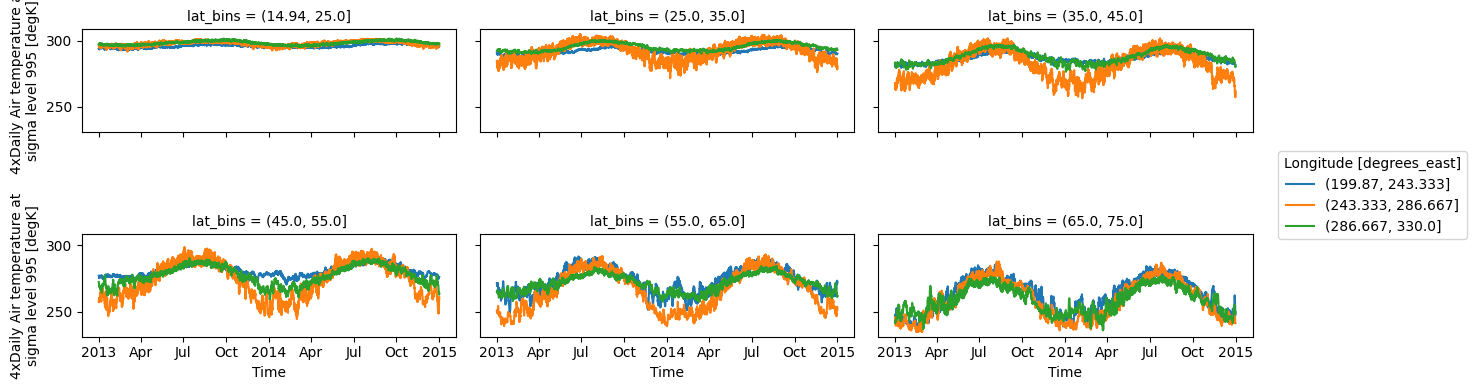

In [6]:
def plot(dataarray, **kwargs):
    default_plot_kws = {"size": 2, "aspect": 2}
    plot_kws = default_plot_kws | kwargs  # !!! merging dicts
    facetgrid = dataarray.plot(**plot_kws)
    return facetgrid.fig


toplot = (
    ds["air"]
    .groupby(lat=xr.groupers.BinGrouper(6), lon=xr.groupers.BinGrouper(3))  # binning
    .mean()
)
fig = plot(
    toplot,
    col="lat_bins",
    col_wrap=3,
    x="time",
    hue="lon_bins",  # subplot_kws={""}
)  # kwargs for xarray plotting

fig.subplots_adjust(hspace=1)  # vertical spacing such that ylabels don't overlap

## Underscore for numbers for readability


In [7]:
10_000

10000

# Defining ``_repr_html_`` and ``__str__`` for a custom class (now easy with ChatGPT)

In [22]:
from html import escape


class ClimateStation:
    def __init__(self, name, location, temp_c, co2_ppm):
        self.name = name
        self.location = location
        self.temp_c = temp_c
        self.co2_ppm = co2_ppm

    def __html__(self):
        safe_name = escape(self.name)
        safe_location = escape(self.location)

        return f"""
        <div style="border:1px solid #ccc;border-radius:8px;padding:8px;
                    font-family:sans-serif;max-width:300px;background:#f9f9f9;">
            <strong style="font-size:1.1em;">{safe_name}</strong><br>
            <span style="color:#555;">{safe_location}</span><br><br>
            🌡 <b>{self.temp_c:.1f}°C</b><br>
            🌍 CO₂: <b>{self.co2_ppm:.1f} ppm</b>
        </div>
        """

    def _repr_html_(self):
        return self.__html__()

    def __str__(self):
        return f"{self.name} ({self.location}): {self.temp_c:.1f}°C, {self.co2_ppm:.1f} ppm"


# Example usage
station1 = ClimateStation("Mauna Loa Observatory", "Hawaii, USA", 24.3, 421.1)
station2 = ClimateStation("Neumayer Station", "Antarctica", -17.8, 410.2)

In [20]:
# string representation
print(station1)

Mauna Loa Observatory (Hawaii, USA): 24.3°C, 421.1 ppm


In [21]:
# html representation
station2